In [33]:
# import matplotlib
# matplotlib.use('nbAgg')

import numpy as np
import time, os, shutil
from os.path import join

import glob
import imageio, tifffile, fnmatch
import datetime
import subprocess as sp 

import warnings
warnings.filterwarnings('ignore')

from tifffile import imread
import copy
from copy import deepcopy

import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.rcParams.update({'figure.max_open_warning': 0})

import fabio, pyFAI
from pyFAI.gui import jupyter

import numpy.ma as ma

In [34]:
%matplotlib inline
# %matplotlib ipympl

In [35]:
ai  = pyFAI.load("/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/LaB6/Exposure=1.0s_dark_sub.poni")
print("\nIntegrator: \n", ai)
msk = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/04-calibrants/mask0.edf').data


Integrator: 
 Detector Dexela 2923	 PixelSize= 7.500e-05, 7.500e-05 m
Wavelength= 1.937139e-11m
SampleDetDist= 1.051996e+00m	PONI= 1.072304e-01, 2.121301e-01m	rot1=-0.004913  rot2= 0.010220  rot3= 0.000000 rad
DirectBeamDist= 1052.064mm	Center: x=2897.321, y=1573.098 pix	Tilt=0.650 deg  tiltPlanRotation= 64.324 deg


In [1]:
b  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/CeO2/Exposure=1.0s_bright.tiff').data.astype('int16')
d  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/CeO2/Exposure=1.0s_dark.tiff').data.astype('int16')
f  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/Exposure=1.0s_flat.tiff').data.astype('int16')
diff_d = b-d
diff_f = b-f

# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#using-numpy-ma
msk_new = deepcopy(msk)
msk_new[~ma.masked_inside(b, -20, 15000).mask] = True

i1d_b = ai.integrate1d(b,4000,unit='2th_deg',mask=msk_new)
i1d_d = ai.integrate1d(d,4000,unit='2th_deg',mask=msk_new)
i1d_f = ai.integrate1d(f,4000,unit='2th_deg',mask=msk_new)
i1d_diff_d = ai.integrate1d(diff_d,4000,unit='2th_deg',mask=msk_new)
i1d_diff_f = ai.integrate1d(diff_f,4000,unit='2th_deg',mask=msk_new,filename='/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/CeO2/CeO2.dat')

i2d_b = ai.integrate2d(b,4000, 360, unit='2th_deg')


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot('221')
jupyter.plot2d(i2d_b, ax=ax)
ax.set_xlim([1,14.5])

ax = fig.add_subplot('223')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.set_xlim([1,14.5])
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

# fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('122')
ax.plot(i1d_d[0],i1d_d[1],label='dark')
ax.plot(i1d_f[0],i1d_f[1],label='flat')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.plot(i1d_diff_d[0],i1d_diff_d[1],label='bright-dark')
ax.plot(i1d_diff_f[0],i1d_diff_f[1],label='bright-flat')
ax.set_xlim([1,14.5])

ax.legend()
ax.set_yscale('log')
ax.set_ylim(top=2000)
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

plt.tight_layout()

plt.savefig('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/CeO2/CeO2.pdf')

NameError: name 'fabio' is not defined

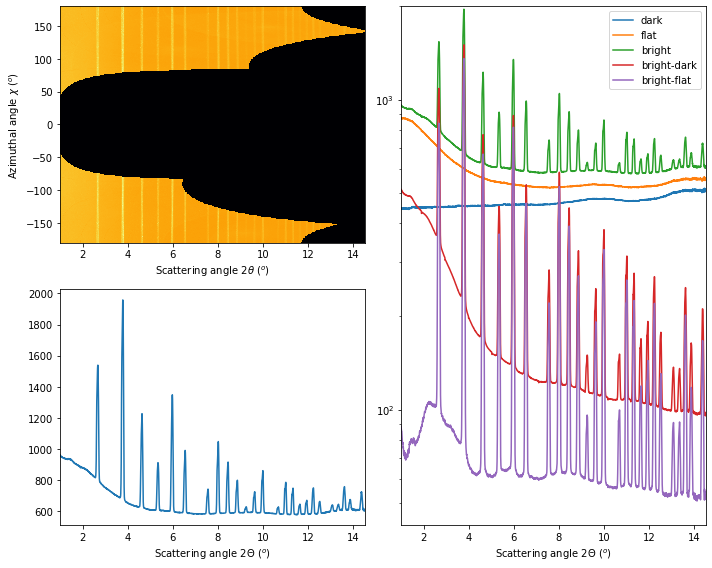

In [37]:
b  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/LaB6/Exposure=1.0s_bright.tiff').data.astype('int16')
d  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/LaB6/Exposure=1.0s_dark.tiff').data.astype('int16')
f  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/Exposure=1.0s_flat.tiff').data.astype('int16')
diff_d = b-d
diff_f = b-f

# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#using-numpy-ma
msk_new = deepcopy(msk)
msk_new[~ma.masked_inside(b, -20, 15000).mask] = True

i1d_b = ai.integrate1d(b,4000,unit='2th_deg',mask=msk_new)
i1d_d = ai.integrate1d(d,4000,unit='2th_deg',mask=msk_new)
i1d_f = ai.integrate1d(f,4000,unit='2th_deg',mask=msk_new)
i1d_diff_d = ai.integrate1d(diff_d,4000,unit='2th_deg',mask=msk_new)
i1d_diff_f = ai.integrate1d(diff_f,4000,unit='2th_deg',mask=msk_new,filename='/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/LaB6/LaB6.dat')

i2d_b = ai.integrate2d(b,4000, 360, unit='2th_deg')


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot('221')
jupyter.plot2d(i2d_b, ax=ax)
ax.set_xlim([1,14.5])

ax = fig.add_subplot('223')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.set_xlim([1,14.5])
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

# fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('122')
ax.plot(i1d_d[0],i1d_d[1],label='dark')
ax.plot(i1d_f[0],i1d_f[1],label='flat')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.plot(i1d_diff_d[0],i1d_diff_d[1],label='bright-dark')
ax.plot(i1d_diff_f[0],i1d_diff_f[1],label='bright-flat')
ax.set_xlim([1,14.5])

ax.legend()
ax.set_yscale('log')
ax.set_ylim(top=2000)
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

plt.tight_layout()

plt.savefig('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/LaB6/LaB6.pdf')

In [38]:
outs = []

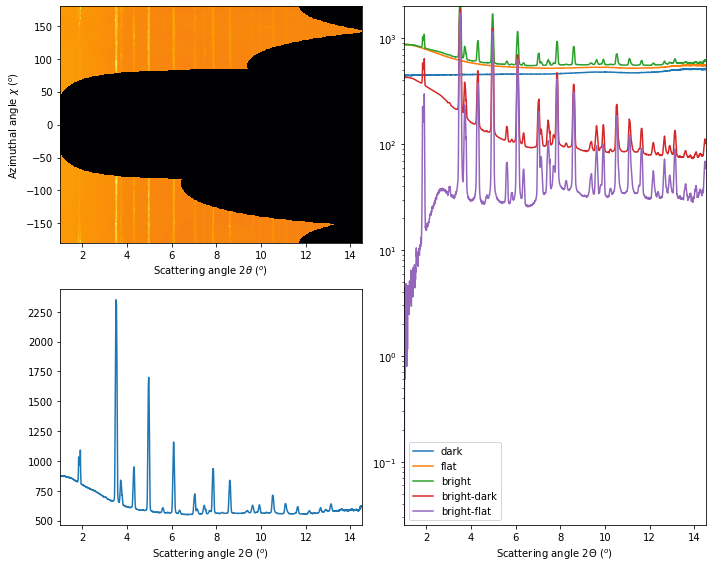

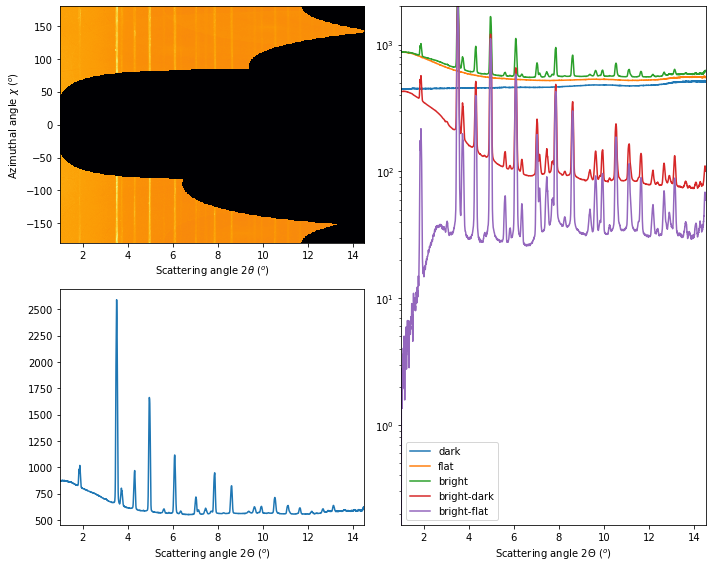

In [39]:
b  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/Exposure=1.0s_bright.tiff').data.astype('int16')
d  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/Exposure=1.0s_dark.tiff').data.astype('int16')
f  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/Exposure=1.0s_flat.tiff').data.astype('int16')
diff_d = b-d
diff_f = b-f

# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#using-numpy-ma
msk_new = deepcopy(msk)
msk_new[~ma.masked_inside(b, -20, 15000).mask] = True

i1d_b = ai.integrate1d(b,4000,unit='2th_deg',mask=msk_new)
i1d_d = ai.integrate1d(d,4000,unit='2th_deg',mask=msk_new)
i1d_f = ai.integrate1d(f,4000,unit='2th_deg',mask=msk_new)
i1d_diff_d = ai.integrate1d(diff_d,4000,unit='2th_deg',mask=msk_new)
i1d_diff_f = ai.integrate1d(diff_f,4000,unit='2th_deg',mask=msk_new,filename='/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/sample1_scan1.dat')

i2d_b = ai.integrate2d(b,4000, 360, unit='2th_deg')


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot('221')
jupyter.plot2d(i2d_b, ax=ax)
ax.set_xlim([1,14.5])

ax = fig.add_subplot('223')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.set_xlim([1,14.5])
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

# fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('122')
ax.plot(i1d_d[0],i1d_d[1],label='dark')
ax.plot(i1d_f[0],i1d_f[1],label='flat')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.plot(i1d_diff_d[0],i1d_diff_d[1],label='bright-dark')
ax.plot(i1d_diff_f[0],i1d_diff_f[1],label='bright-flat')
ax.set_xlim([1,14.5])

ax.legend()
ax.set_yscale('log')
ax.set_ylim(top=2000)
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

plt.tight_layout()

plt.savefig('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan1/sample1_scan1.pdf')
outs.append([i1d_diff_f[0],i1d_diff_f[1]])




b  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan2/Exposure=1.0s_bright.tiff').data.astype('int16')
d  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan2/Exposure=1.0s_dark.tiff').data.astype('int16')
f  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan2/Exposure=1.0s_flat.tiff').data.astype('int16')
diff_d = b-d
diff_f = b-f

# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#using-numpy-ma
msk_new = deepcopy(msk)
msk_new[~ma.masked_inside(b, -20, 15000).mask] = True

i1d_b = ai.integrate1d(b,4000,unit='2th_deg',mask=msk_new)
i1d_d = ai.integrate1d(d,4000,unit='2th_deg',mask=msk_new)
i1d_f = ai.integrate1d(f,4000,unit='2th_deg',mask=msk_new)
i1d_diff_d = ai.integrate1d(diff_d,4000,unit='2th_deg',mask=msk_new)
i1d_diff_f = ai.integrate1d(diff_f,4000,unit='2th_deg',mask=msk_new,filename='/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan2/sample1_scan2.dat')

i2d_b = ai.integrate2d(b,4000, 360, unit='2th_deg')


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot('221')
jupyter.plot2d(i2d_b, ax=ax)
ax.set_xlim([1,14.5])

ax = fig.add_subplot('223')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.set_xlim([1,14.5])
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

# fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('122')
ax.plot(i1d_d[0],i1d_d[1],label='dark')
ax.plot(i1d_f[0],i1d_f[1],label='flat')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.plot(i1d_diff_d[0],i1d_diff_d[1],label='bright-dark')
ax.plot(i1d_diff_f[0],i1d_diff_f[1],label='bright-flat')
ax.set_xlim([1,14.5])

ax.legend()
ax.set_yscale('log')
ax.set_ylim(top=2000)
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

plt.tight_layout()

plt.savefig('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S1/scan2/sample1_scan2.pdf')
outs.append([i1d_diff_f[0],i1d_diff_f[1]])

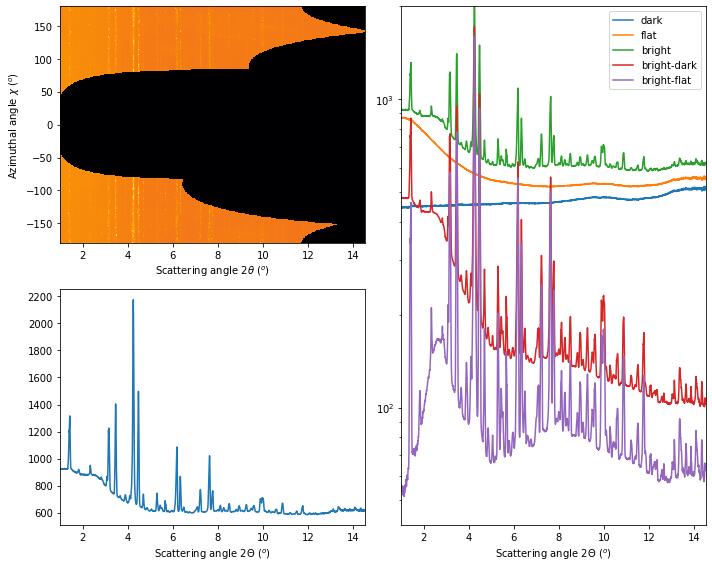

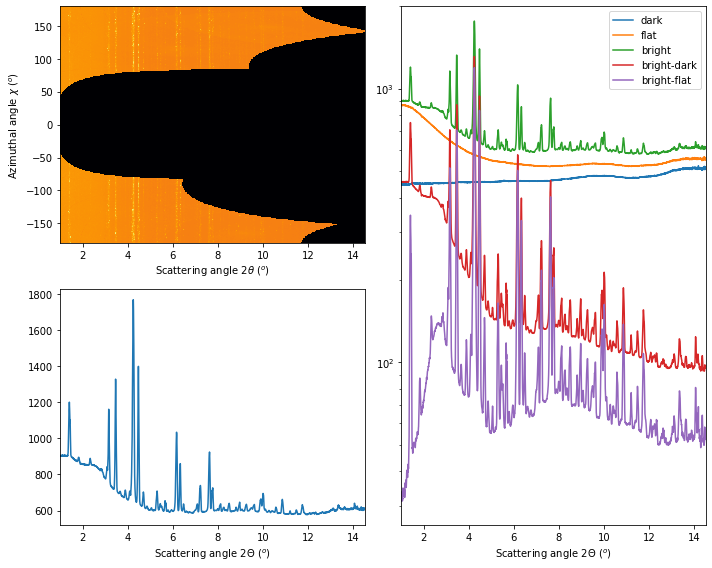

In [42]:
b  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan1/Exposure=1.0s_bright.tiff').data.astype('int16')
d  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan1/Exposure=1.0s_dark.tiff').data.astype('int16')
f  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan1/Exposure=1.0s_flat.tiff').data.astype('int16')
diff_d = b-d
diff_f = b-f

# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#using-numpy-ma
msk_new = deepcopy(msk)
msk_new[~ma.masked_inside(b, -20, 15000).mask] = True

i1d_b = ai.integrate1d(b,4000,unit='2th_deg',mask=msk_new)
i1d_d = ai.integrate1d(d,4000,unit='2th_deg',mask=msk_new)
i1d_f = ai.integrate1d(f,4000,unit='2th_deg',mask=msk_new)
i1d_diff_d = ai.integrate1d(diff_d,4000,unit='2th_deg',mask=msk_new)
i1d_diff_f = ai.integrate1d(diff_f,4000,unit='2th_deg',mask=msk_new,filename='/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan1/sample2_scan1.dat')

i2d_b = ai.integrate2d(b,4000, 360, unit='2th_deg')


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot('221')
jupyter.plot2d(i2d_b, ax=ax)
ax.set_xlim([1,14.5])

ax = fig.add_subplot('223')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.set_xlim([1,14.5])
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

# fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('122')
ax.plot(i1d_d[0],i1d_d[1],label='dark')
ax.plot(i1d_f[0],i1d_f[1],label='flat')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.plot(i1d_diff_d[0],i1d_diff_d[1],label='bright-dark')
ax.plot(i1d_diff_f[0],i1d_diff_f[1],label='bright-flat')
ax.set_xlim([1,14.5])

ax.legend()
ax.set_yscale('log')
ax.set_ylim(top=2000)
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

plt.tight_layout()

plt.savefig('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan1/sample2_scan1.pdf')
outs.append([i1d_diff_f[0],i1d_diff_f[1]])




b  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan2/Exposure=1.0s_bright.tiff').data.astype('int16')
d  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan2/Exposure=1.0s_dark.tiff').data.astype('int16')
f  = fabio.open('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan2/Exposure=1.0s_flat.tiff').data.astype('int16')
diff_d = b-d
diff_f = b-f

# https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html#using-numpy-ma
msk_new = deepcopy(msk)
msk_new[~ma.masked_inside(b, -20, 15000).mask] = True

i1d_b = ai.integrate1d(b,4000,unit='2th_deg',mask=msk_new)
i1d_d = ai.integrate1d(d,4000,unit='2th_deg',mask=msk_new)
i1d_f = ai.integrate1d(f,4000,unit='2th_deg',mask=msk_new)
i1d_diff_d = ai.integrate1d(diff_d,4000,unit='2th_deg',mask=msk_new)
i1d_diff_f = ai.integrate1d(diff_f,4000,unit='2th_deg',mask=msk_new,filename='/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan2/sample2_scan2.dat')

i2d_b = ai.integrate2d(b,4000, 360, unit='2th_deg')


fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot('221')
jupyter.plot2d(i2d_b, ax=ax)
ax.set_xlim([1,14.5])

ax = fig.add_subplot('223')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.set_xlim([1,14.5])
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

# fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot('122')
ax.plot(i1d_d[0],i1d_d[1],label='dark')
ax.plot(i1d_f[0],i1d_f[1],label='flat')
ax.plot(i1d_b[0],i1d_b[1],label='bright')
ax.plot(i1d_diff_d[0],i1d_diff_d[1],label='bright-dark')
ax.plot(i1d_diff_f[0],i1d_diff_f[1],label='bright-flat')
ax.set_xlim([1,14.5])

ax.legend()
ax.set_yscale('log')
ax.set_ylim(top=2000)
ax.set_xlabel('Scattering angle 2$\Theta$ ($^o$)')

plt.tight_layout()

plt.savefig('/data/beamtimes/2020-1/Jan-XRD-CT/D-hutch/06-ED/S2/scan2/sample2_scan2.pdf')
outs.append([i1d_diff_f[0],i1d_diff_f[1]])

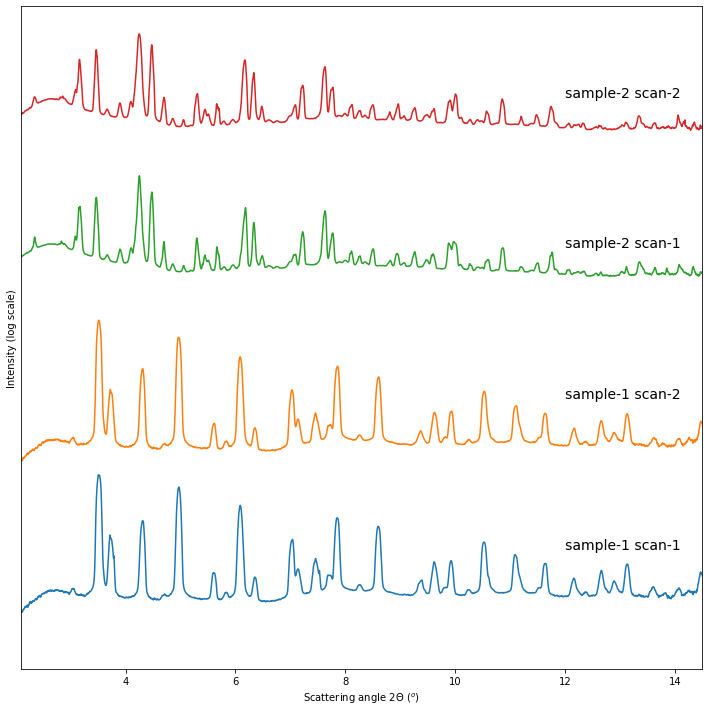

In [41]:
plt.figure(figsize=(10,10))

labels = ['sample-1 scan-1','sample-1 scan-2', 'sample-2 scan-1','sample-2 scan-2']
s=0
for e,i in enumerate(outs):
    plt.plot(i[0],s+np.log(i[1]))
    plt.text(12, s+5,labels[e], fontsize=14)
    s+=5
# plt.text(15, (s+2)/2, 'Sample id', rotation=-90)
plt.xlim([2.1,14.5])
plt.ylim(bottom=1,top=23)
plt.yticks([])
plt.xlabel('Scattering angle 2$\Theta$ ($^o$)')
plt.ylabel('Intensity (log scale)')

plt.tight_layout()

plt.savefig('plot.pdf')